<a href="https://colab.research.google.com/github/A-Solders/hello-world/blob/master/Gauss_proc_GPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Density estimation using Gaussian Processes with GPy

In [1]:
# Import libreraies
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import GPy

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

ModuleNotFoundError: ignored

Import data

In [0]:
data=pd.read_csv('/Users/andreassolders/Box Sync/AlFONS_shared/Measurments/Measurement_IGISOL_2019/Homogenity/homo_sel.csv')
data['hit']=np.ones(len(data.index))
data.head()

,x_pos_d,y_pos_d,angle,radius,hit
0,-0.8250,-0.5280,290.560415,1.534761,1.0
1,1.6170,0.0495,343.916350,3.102435,1.0
2,-4.8015,2.1120,160.711810,3.641925,1.0
3,-0.7425,5.6760,82.571932,4.807343,1.0
4,4.7025,1.6500,6.963966,6.111588,1.0


(-25, 25)

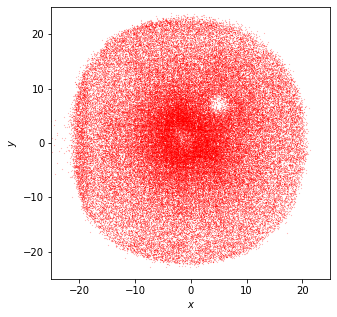

In [0]:
# Plot the data
plt.figure(figsize=[5,5])
plt.plot(data.x_pos_d, data.y_pos_d, 'r.', markersize=0.2, label='hits')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-25, 25)
plt.xlim(-25, 25)

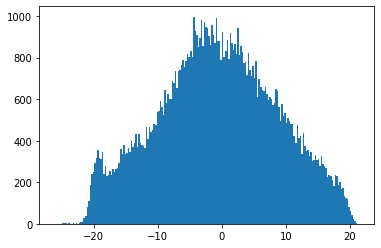

In [0]:
# Histogram data

z, bins = np.histogram(data.x_pos_d, bins=200)

width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, z, align='center', width=width)
plt.show()


In [0]:
X = np.atleast_2d(center).T
Y = np.atleast_2d(z).T
#X = np.random.uniform(-3.,3.,(20,1))
#Y = np.sin(X) + np.random.randn(20,1)*0.05
#print(X)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1)
m = GPy.models.GPRegression(X,Y,kernel,noise_var=1)
print(m)


Name : GP regression
Objective : 2678447.520375453
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


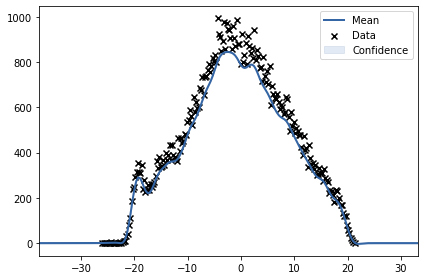

In [0]:
#GPy.plotting.change_plotting_library('plotly')
fig = m.plot()
#GPy.plotting.show(fig)

{}

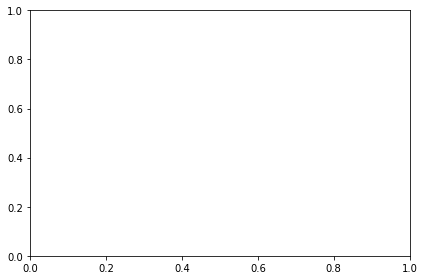

In [0]:
m.plot_data_error()

In [0]:
#m.optimize_restarts(num_restarts = 10)
m.optimize(max_f_eval = 1000)
print(m)


Name : GP regression
Objective : 1066.289125395304
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  209097.39292823136  |      +ve      |        
  rbf.lengthscale          |   7.000056852563946  |      +ve      |        
  Gaussian_noise.variance  |  1813.8990827708335  |      +ve      |        


(-100, 1200)

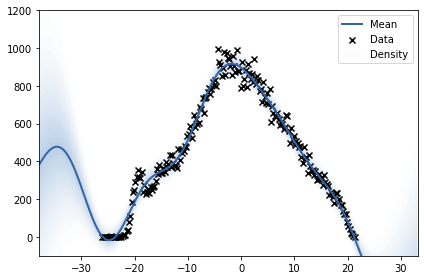

In [0]:
fig = m.plot(plot_density=True)
plt.ylim(-100, 1200)
#GPy.plotting.show(fig)


{}

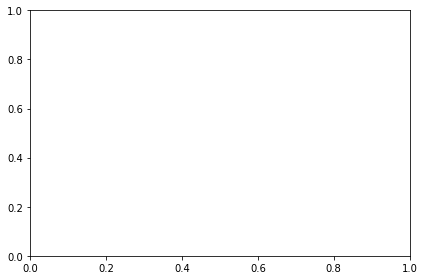

In [0]:
m.plot_data_error()

In [0]:
# 2D Histogram data in (x,y)
plt.figure(figsize=[5,5])

histdata, xbins, ybins = np.histogram2d(data.x_pos_d, data.y_pos_d, bins=60)

xwidth = 1 * (xbins[1] - xbins[0])
ywidth = 1 * (ybins[1] - ybins[0])
xcenter = (xbins[:-1] + xbins[1:]) / 2
ycenter = (ybins[:-1] + ybins[1:]) / 2
plt.contourf(xcenter, ycenter, histdata)
plt.show()
#print(xbins)

In [0]:
plt.figure(figsize=[5,5])
plt.pcolormesh(xbins,ybins,histdata)
plt.show()

In [0]:
XY = np.array([xcenter,ycenter]).T

# define kernel
kernel2 = GPy.kern.RBF(input_dim=2, variance=100, lengthscale=1)

# create simple GP model
m2 = GPy.models.GPRegression(XY,histdata,kernel2)

# optimize and plot (By deafult, GPy uses the lbfgsb optimizer.)
#m2.optimize(max_f_eval = 1000)
m2.optimize_restarts(num_restarts = 10)

#fig = m.plot
#GPy.plotting.show(fig)


#fig = m.plot()
#display(GPy.plotting.show(fig))
#display(m)

In [0]:
print(m2)


In [0]:
K = np.arange(0, 30, 1)[:, None]
rates = np.arange(0, 40, 1)[:, None]

In [0]:
print(rates)
